In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import kwat

In [3]:
fu = kwat.information.get_ic

In [4]:
import numpy as np
import pandas as pd

In [5]:
def simulate(sh, n_ca=None):

    if n_ca is None:

        vector = np.random.normal(size=sh[1])

        matrix = np.random.normal(size=sh)

    else:

        vector = np.random.randint(0, high=n_ca, size=sh[1])

        matrix = np.random.randint(0, high=n_ca, size=sh)

    la1_ = pd.Index(("Label {}".format(i) for i in range(sh[1])), name="Axis 1")

    return (
        pd.Series(vector, index=la1_, name="Vector"),
        pd.DataFrame(
            matrix,
            pd.Index(("Label {}".format(i) for i in range(sh[0])), name="Axis 0"),
            columns=la1_,
        ),
    )

## make

Computing score with get_ic
Computing margin of error with 10 sampling
Computing p-value and q-value with 10 shuffling


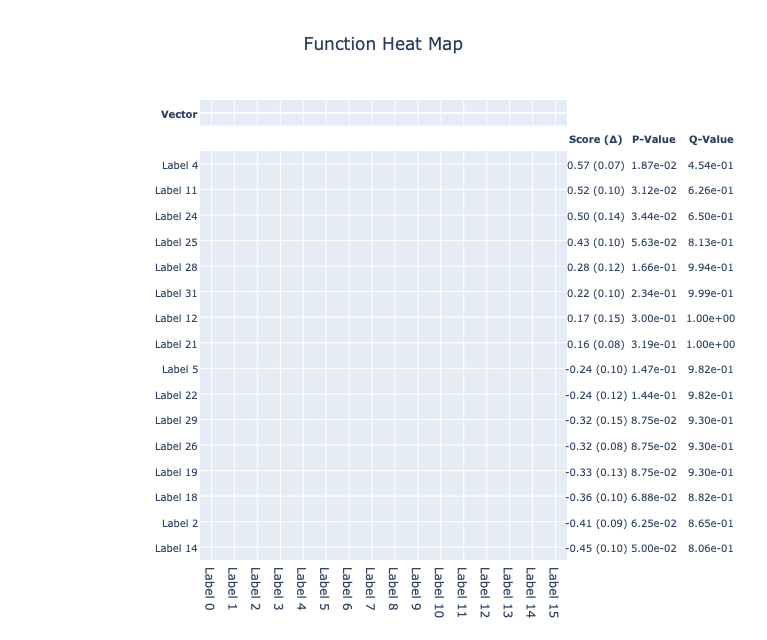

Score  Margin of Error   P-Value   Q-Value
Label 4   0.572493         0.069220  0.018750  0.454306
Label 11  0.518695         0.099956  0.031250  0.626266
Label 24  0.500561         0.137477  0.034375  0.649849
Label 25  0.432762         0.096392  0.056250  0.813426
Label 28  0.282481         0.117795  0.165625  0.993718
Label 31  0.224710         0.099792  0.234375  0.999261
Label 12  0.171401         0.146523  0.300000  0.999906
Label 21  0.163037         0.076497  0.318750  0.999932
Label 23  0.129226         0.092221  0.375000  0.999977
Label 30  0.104038         0.122999  0.437500  0.999977
Label 16  0.102653         0.124315  0.437500  0.999977
Label 20  0.094732         0.043301  0.446875  0.999977
Label 27  0.084971         0.084537  0.468750  0.999977
Label 15  0.080496         0.082525  0.475000  0.999977
Label 17  0.066192         0.152871  0.500000  0.999977
Label 8   0.061946         0.113115  0.487500  0.999977
Label 1  -0.064036         0.096518  0.450000  0.999961
Label 10 -0.092308         0.091514  0.406250  0.999916
Label 13 -0.134519         0.155114  0.318750  0.999320
Label 3  -0.150397         0.079647  0.271875  0.998246
Label 6  -0.159678         0.105817  0.246875  0.997405
Label 7  -0.181086         0.076761  0.221875  0.995991
Label 9  -0.207557         0.088869  0.181250  0.989943
Label 0  -0.233256         0.142376  0.153125  0.982315
Label 5  -0.236099         0.104126  0.146875  0.982315
Label 22 -0.237394         0.121057  0.143750  0.982315
Label 29 -0.315866         0.148644  0.087500  0.929733
Label 26 -0.324473         0.082361  0.087500  0.929733
Label 19 -0.326219         0.127631  0.087500  0.929733
Label 18 -0.358058         0.103907  0.068750  0.881971
Label 2  -0.407914         0.093783  0.062500  0.864759
Label 14 -0.453172         0.102255  0.050000  0.806289

In [6]:
(ta, da) = simulate([32, 16])

ta.iloc[-8::2] = np.nan

kwat.function_heat_map.make(ta, da, fu, ac=None)

Computing score with get_ic
Computing margin of error with 10 sampling
Computing p-value and q-value with 10 shuffling


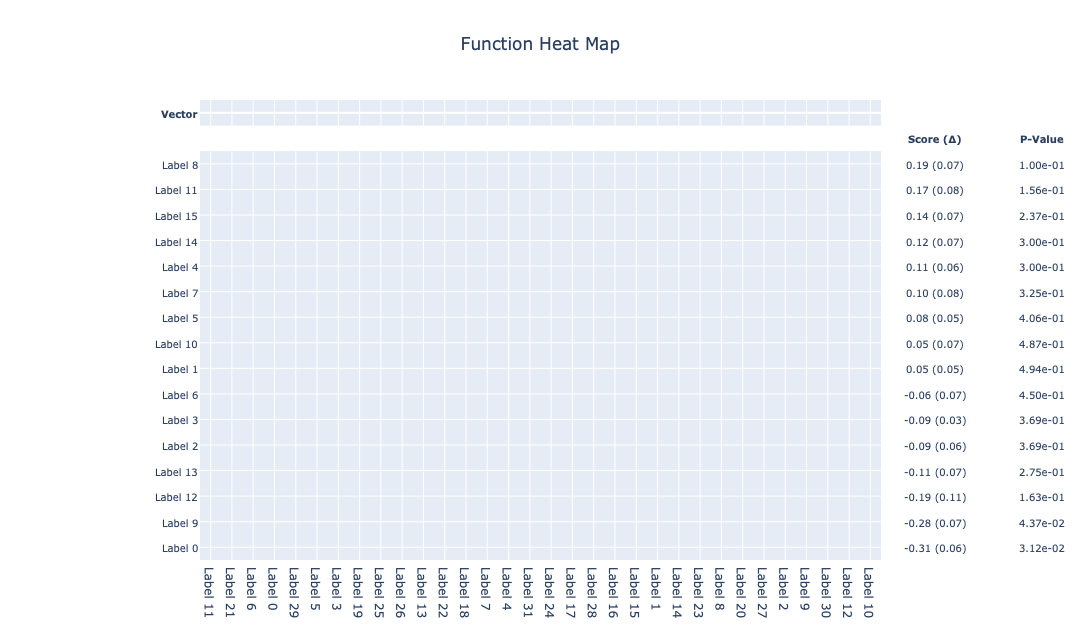

Score  Margin of Error  P-Value   Q-Value
Label 8   0.188188         0.067550  0.10000  0.814698
Label 11  0.170785         0.083524  0.15625  0.921800
Label 15  0.141223         0.074619  0.23750  0.977543
Label 14  0.115089         0.073193  0.30000  0.990311
Label 4   0.114518         0.059406  0.30000  0.990311
Label 7   0.104754         0.080865  0.32500  0.990311
Label 5   0.077040         0.051947  0.40625  0.994555
Label 10  0.053627         0.073383  0.48750  0.997561
Label 1   0.050099         0.053196  0.49375  0.997561
Label 6  -0.063841         0.070732  0.45000  0.997467
Label 3  -0.088541         0.026706  0.36875  0.995997
Label 2  -0.089632         0.062972  0.36875  0.995997
Label 13 -0.113578         0.069241  0.27500  0.984710
Label 12 -0.190121         0.110086  0.16250  0.916481
Label 9  -0.276266         0.067069  0.04375  0.488823
Label 0  -0.312553         0.059710  0.03125  0.398290

In [7]:
(ta, da) = simulate([16, 32])

da.iloc[:, 0] = np.nan

da.iloc[-8:, -8:] = np.nan

kwat.function_heat_map.make(ta, da, fu)

Computing score with get_ic
Clustering 0
Clustering 2


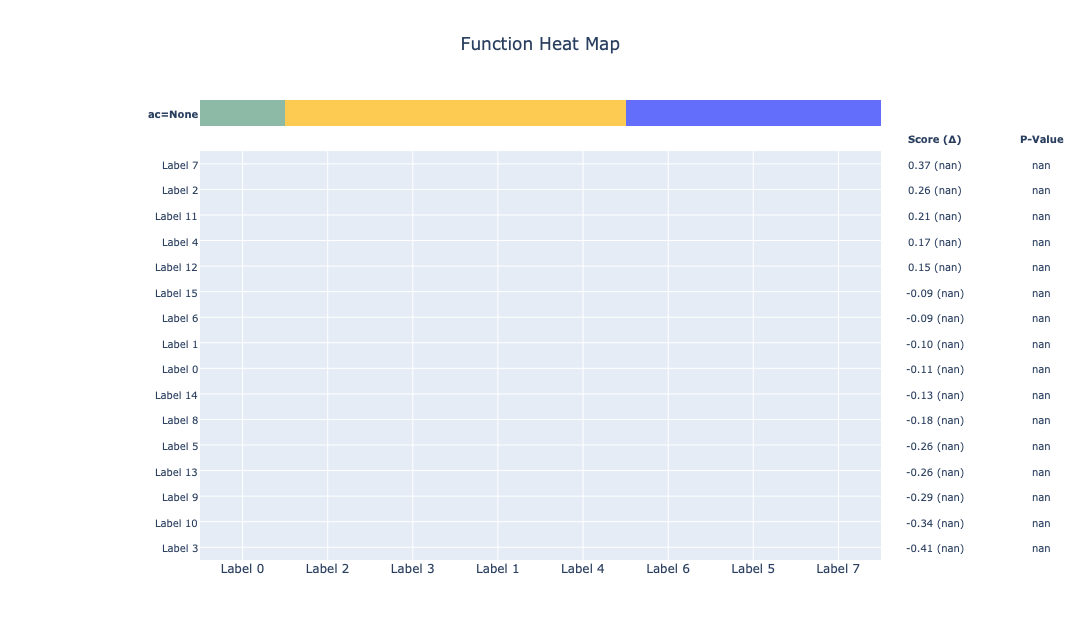

Computing score with get_ic
Clustering 0
Clustering 2


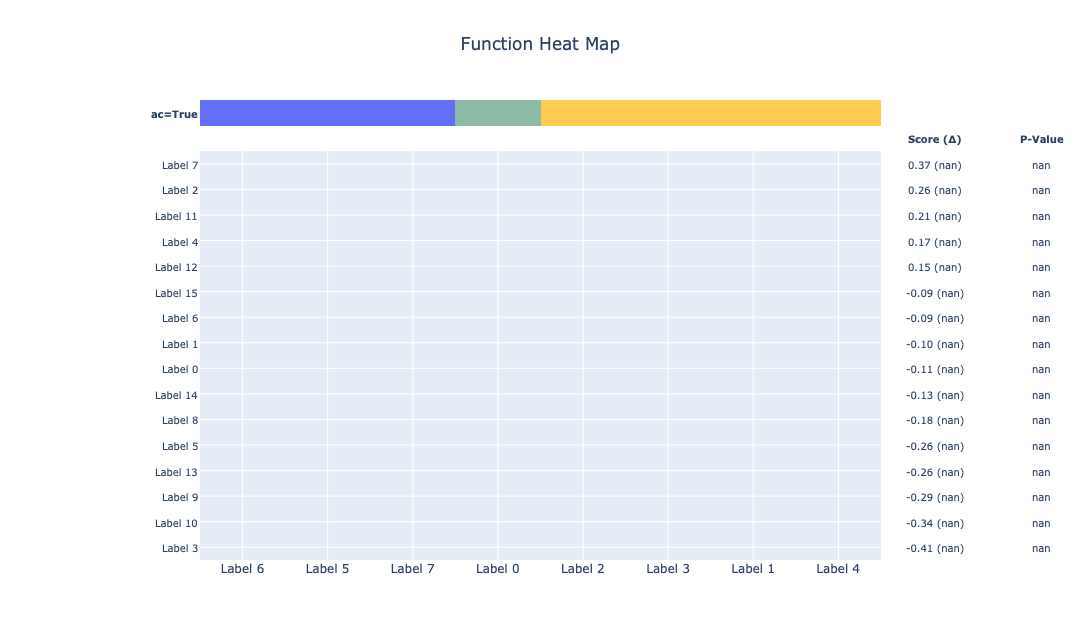

Computing score with get_ic
Clustering 0
Clustering 2


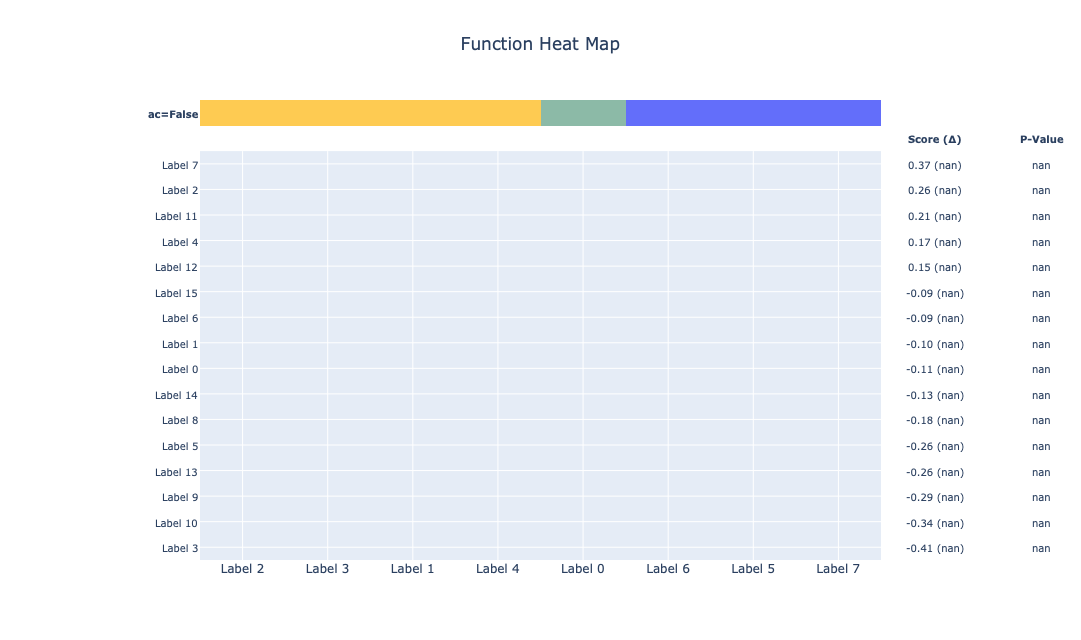

Computing score with get_ic
Clustering 0
Clustering 2


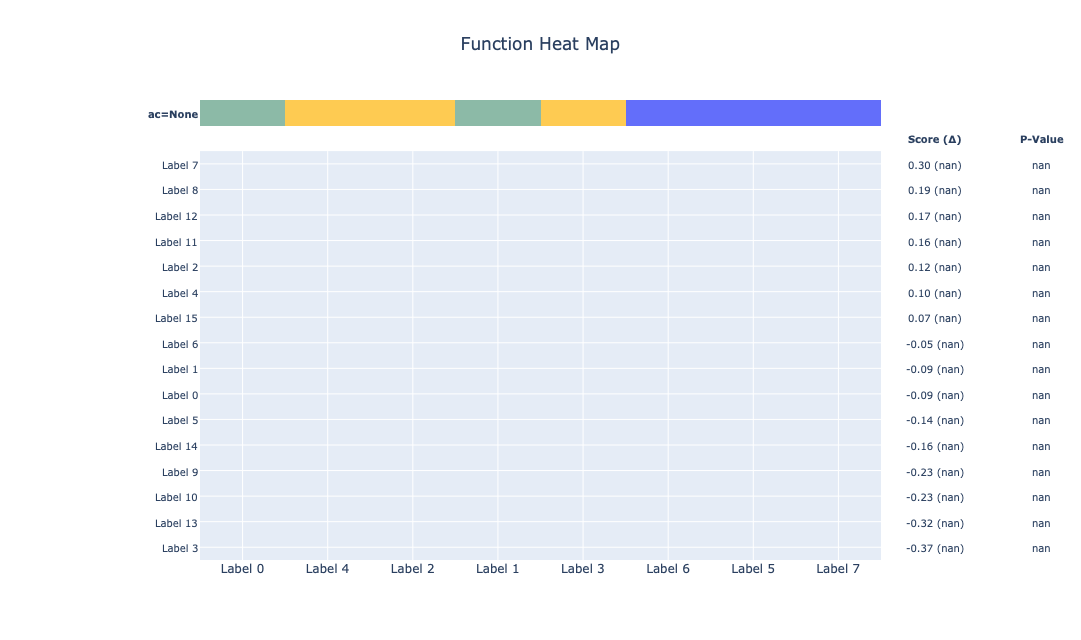

Computing score with get_ic
Clustering 0
Clustering 2


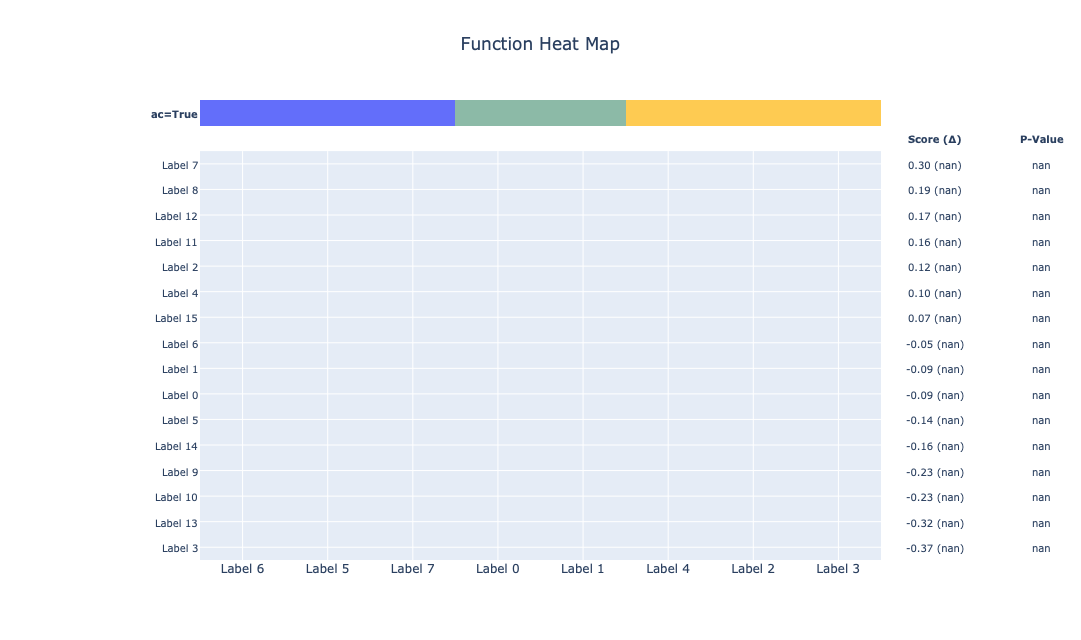

Computing score with get_ic
Clustering 0
Clustering 2


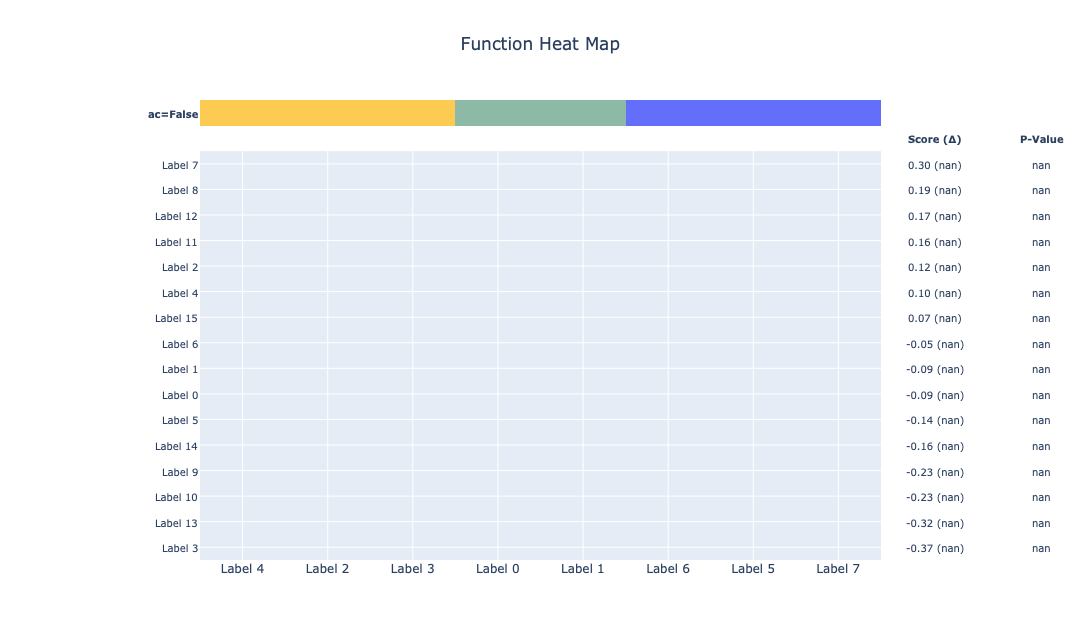

In [10]:
da = simulate([16, 8])[1]

for nu_ in [[1, 2, 2, 2, 2, 0, 0, 0], [1, 1, 2, 2, 2, 0, 0, 0]]:

    ta = pd.Series(nu_, index=da.columns)

    for ac in [None, True, False]:

        ta.name = "ac={}".format(ac)

        kwat.function_heat_map.make(ta, da, fu, ac=ac, tyt="categorical", n_sa=0, n_sh=0)

In [11]:
ta = pd.read_csv("data/function_heat_map_ta.tsv", sep="\t", index_col=0, squeeze=True)

da = pd.read_csv("data/function_heat_map_da.tsv", sep="\t", index_col=0)

Computing score with get_ic


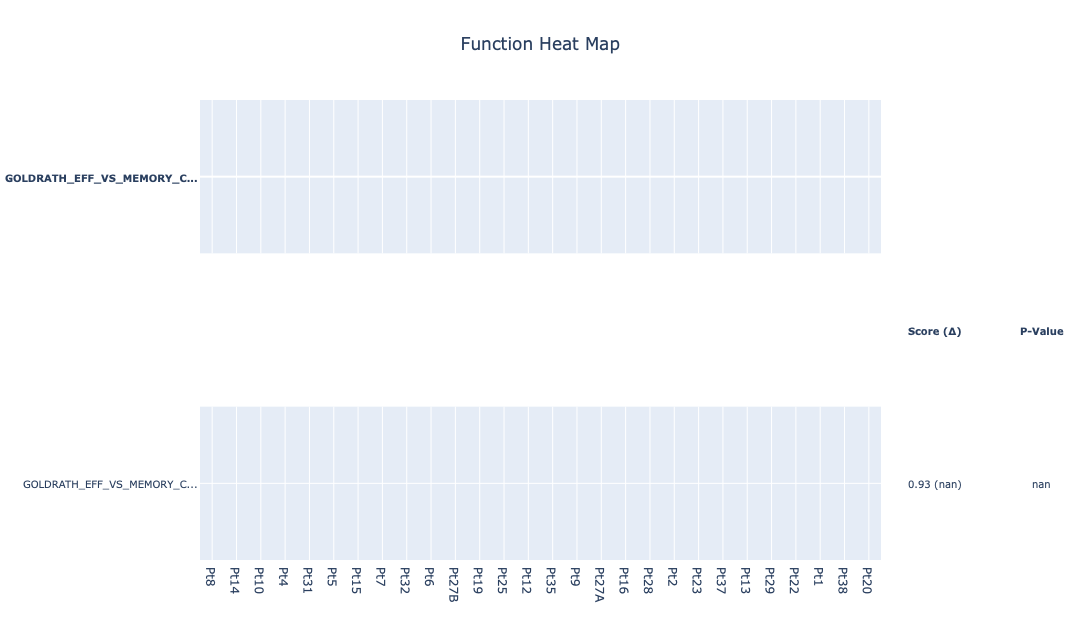

Computing score with get_ic


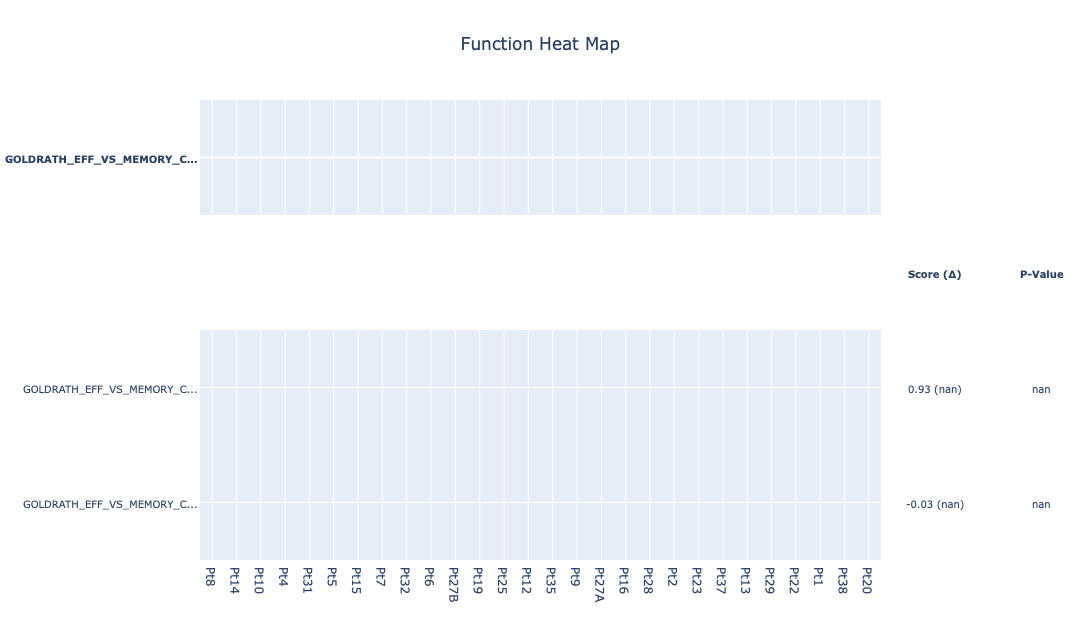

Computing score with get_ic


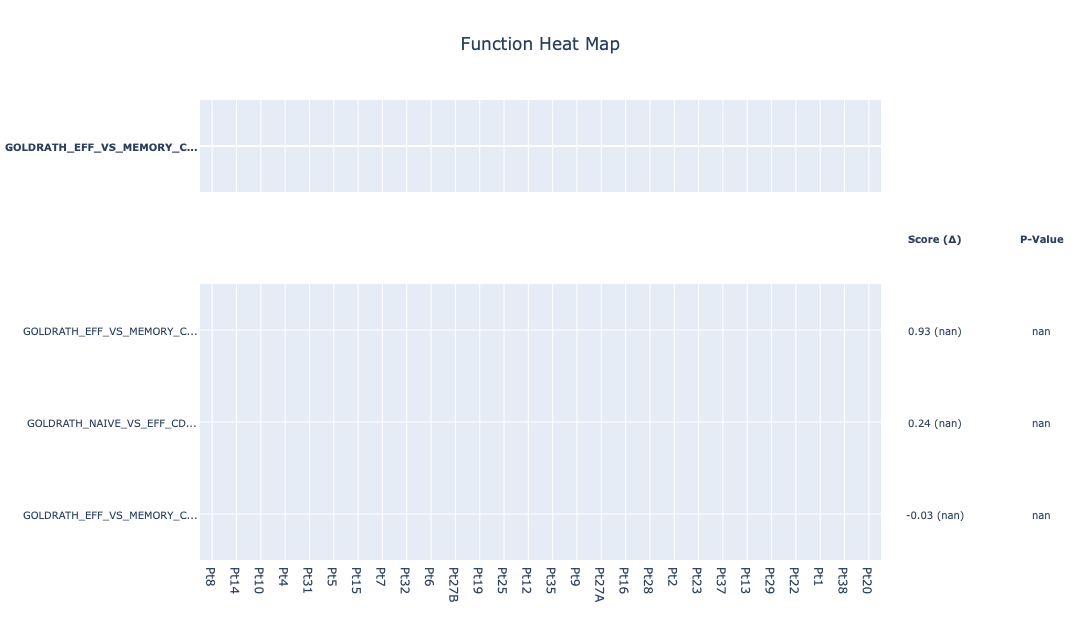

In [12]:
for n_row in [1, 2, 3]:

    kwat.function_heat_map.make(
        da.iloc[0, :], da.iloc[:n_row, :], fu, n_sa=0, n_sh=0, st=3
    )

Computing score with get_ic
Computing margin of error with 10 sampling
Computing p-value and q-value with 10 shuffling
Clustering 0
Clustering 1


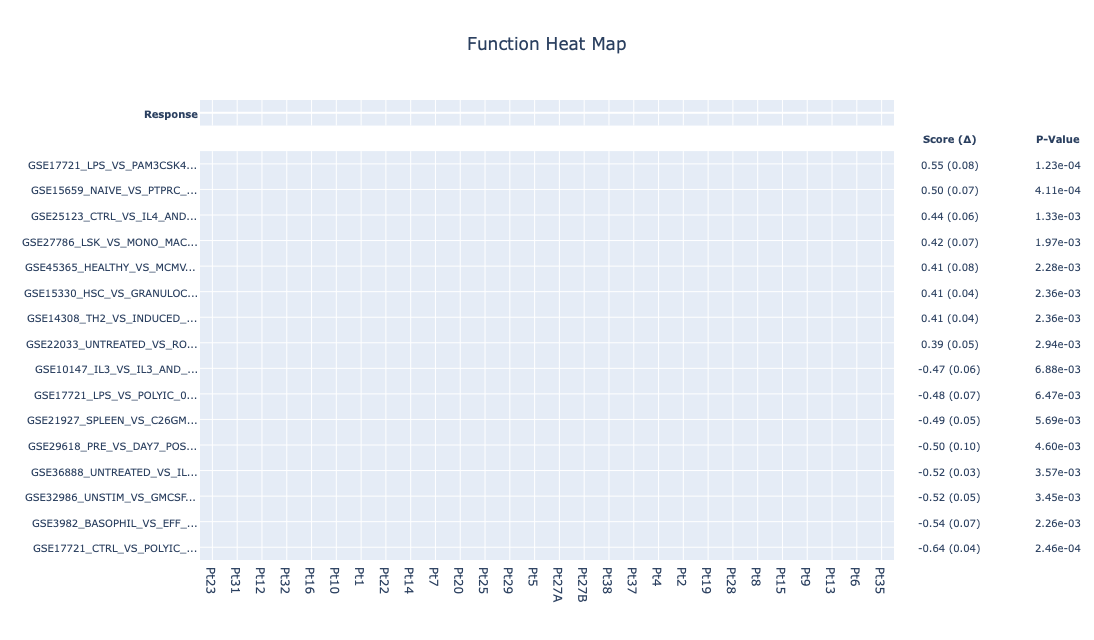

Score  Margin of Error  \
GSE17721_LPS_VS_PAM3CSK4_1H_BMDC_UP                 0.554753         0.077076   
GSE15659_NAIVE_VS_PTPRC_NEG_CD4_TCELL_UP            0.499653         0.070802   
GSE25123_CTRL_VS_IL4_AND_ROSIGLITAZONE_STIM_PPA...  0.439607         0.059128   
GSE27786_LSK_VS_MONO_MAC_UP                         0.417789         0.068862   
GSE45365_HEALTHY_VS_MCMV_INFECTION_CD11B_DC_UP      0.412063         0.075992   
...                                                      ...              ...   
GSE29618_PRE_VS_DAY7_POST_TIV_FLU_VACCINE_MONOC... -0.502429         0.095639   
GSE36888_UNTREATED_VS_IL2_TREATED_TCELL_2H_DN      -0.520239         0.030004   
GSE32986_UNSTIM_VS_GMCSF_STIM_DC_DN                -0.522771         0.054336   
GSE3982_BASOPHIL_VS_EFF_MEMORY_CD4_TCELL_DN        -0.543286         0.065598   
GSE17721_CTRL_VS_POLYIC_0.5H_BMDC_DN               -0.640872         0.043401   

                                                     P-Value   Q-Value  
GSE17721_LPS_VS_PAM3CSK4_1H_BMDC_UP                 0.000123  0.451209  
GSE15659_NAIVE_VS_PTPRC_NEG_CD4_TCELL_UP            0.000411  0.864665  
GSE25123_CTRL_VS_IL4_AND_ROSIGLITAZONE_STIM_PPA...  0.001334  0.998499  
GSE27786_LSK_VS_MONO_MAC_UP                         0.001970  0.999933  
GSE45365_HEALTHY_VS_MCMV_INFECTION_CD11B_DC_UP      0.002278  0.999985  
...                                                      ...       ...  
GSE29618_PRE_VS_DAY7_POST_TIV_FLU_VACCINE_MONOC...  0.004598  1.000000  
GSE36888_UNTREATED_VS_IL2_TREATED_TCELL_2H_DN       0.003571  1.000000  
GSE32986_UNSTIM_VS_GMCSF_STIM_DC_DN                 0.003448  1.000000  
GSE3982_BASOPHIL_VS_EFF_MEMORY_CD4_TCELL_DN         0.002258  0.999983  
GSE17721_CTRL_VS_POLYIC_0.5H_BMDC_DN                0.000246  0.698850  

[4872 rows x 4 columns]

In [14]:
kwat.function_heat_map.make(ta, da, fu, n_jo=8, n_sa=10, n_sh=10, tyt="binary")

Computing score with get_ic


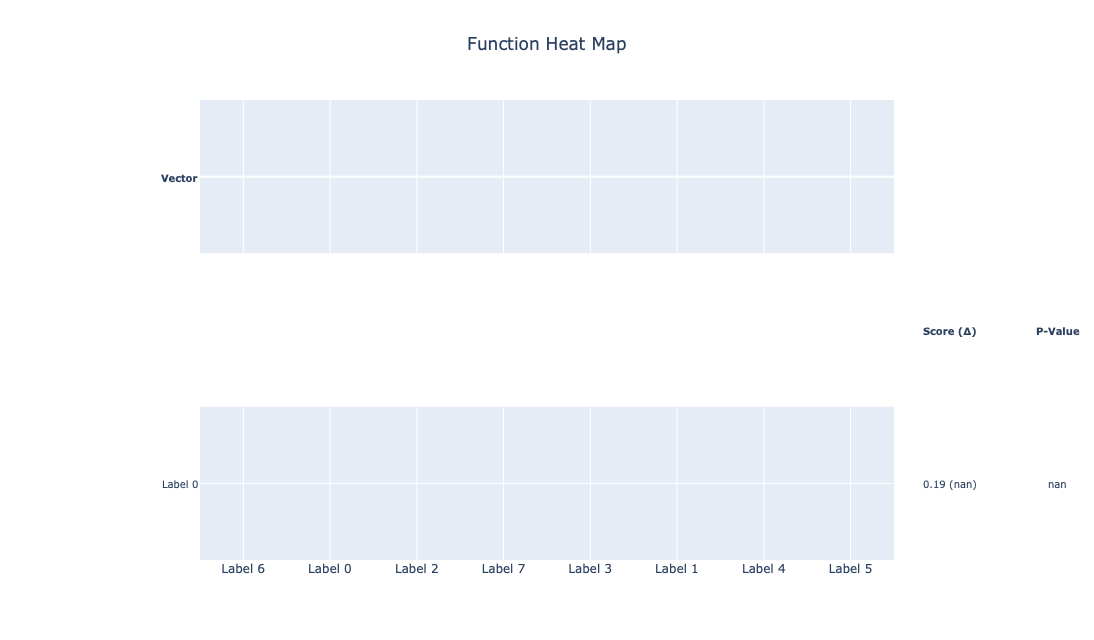

Computing score with get_ic


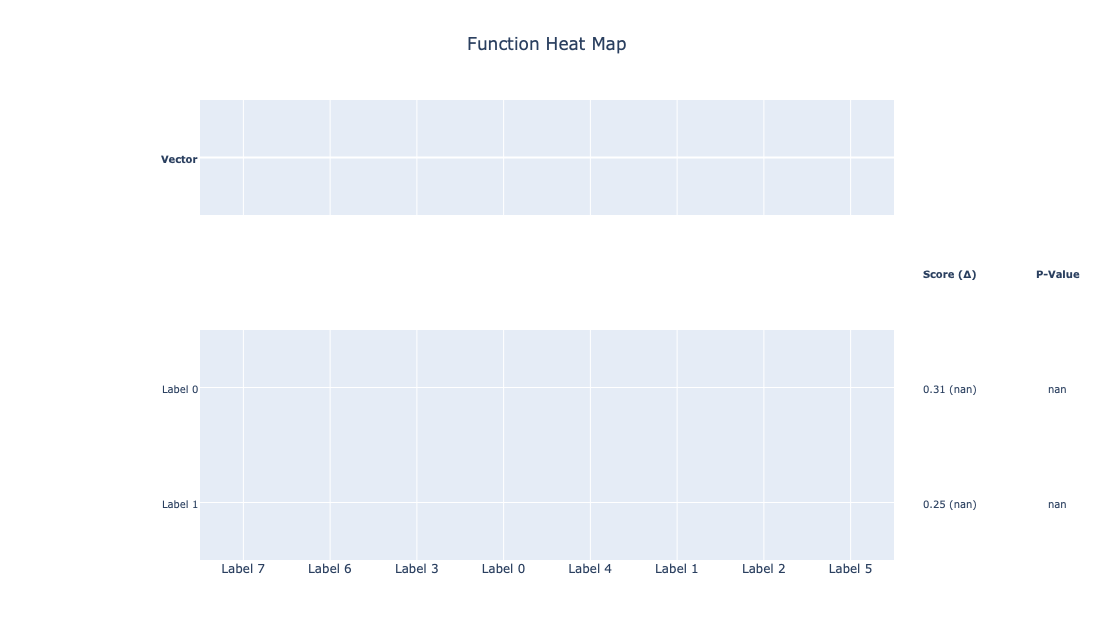

Computing score with get_ic


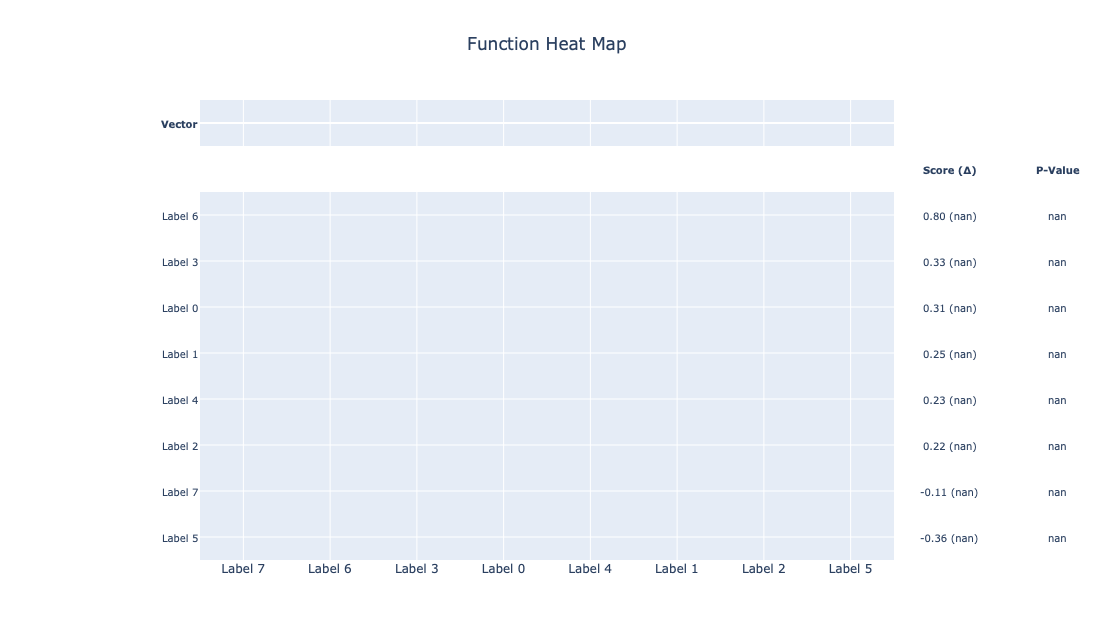

Computing score with get_ic


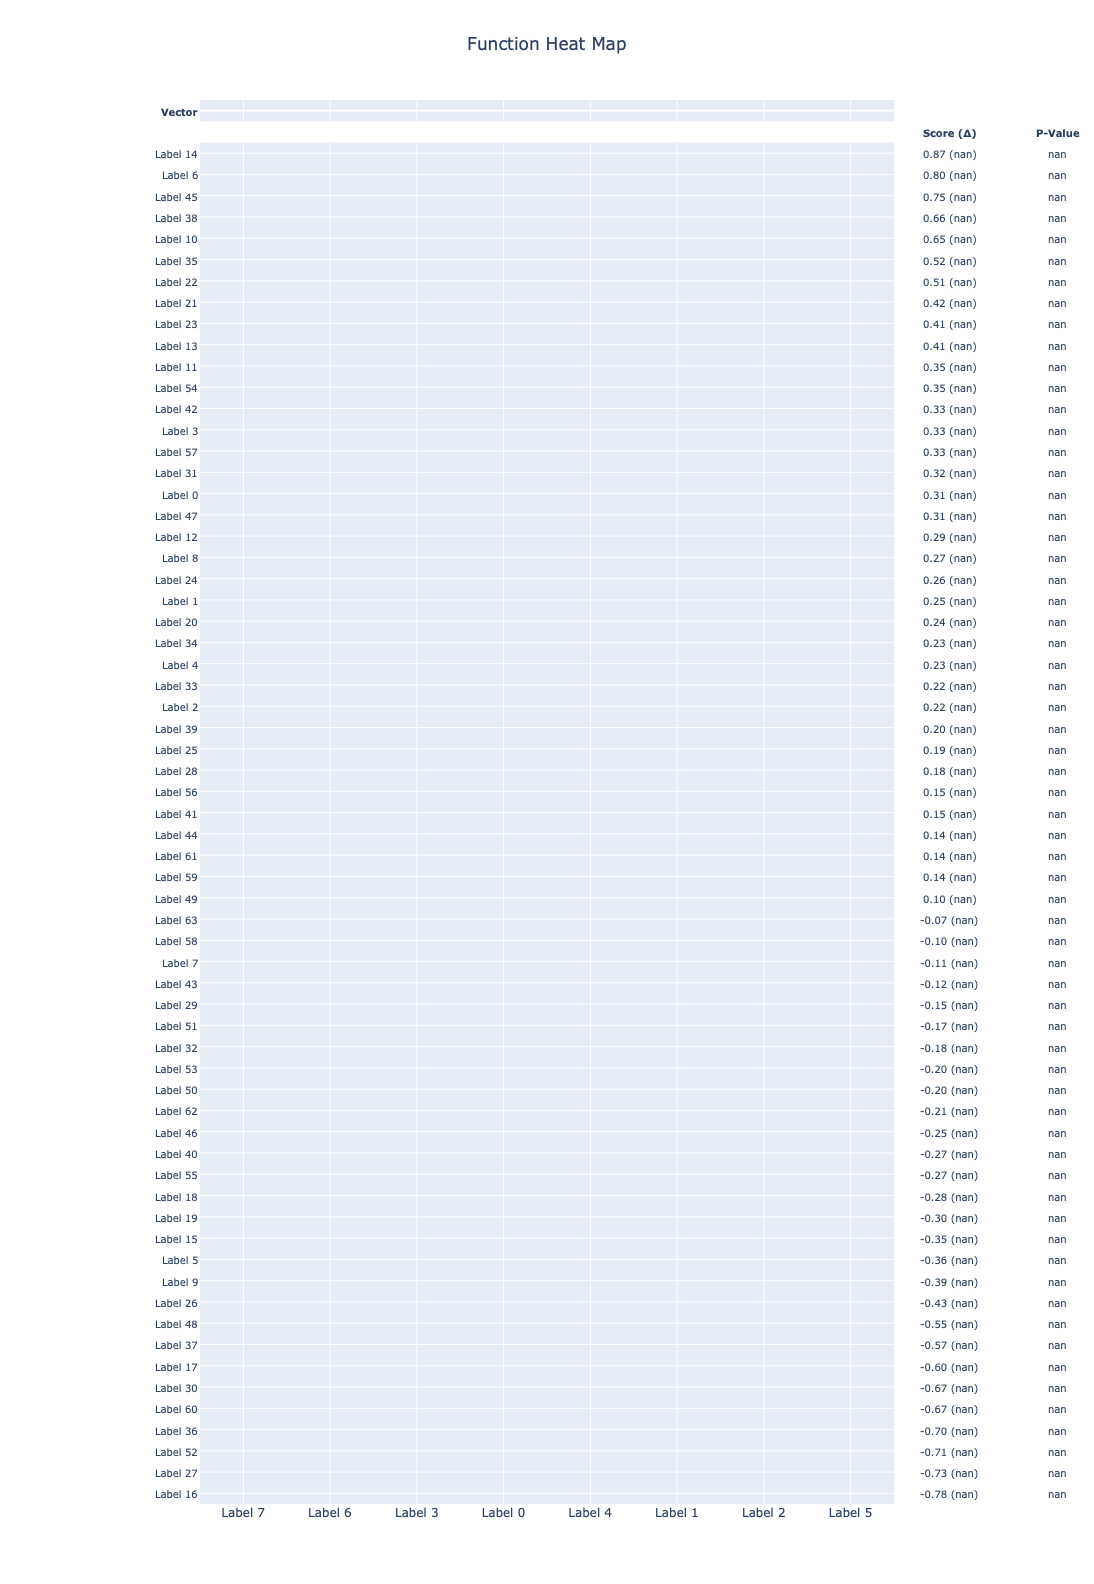

Computing score with get_ic


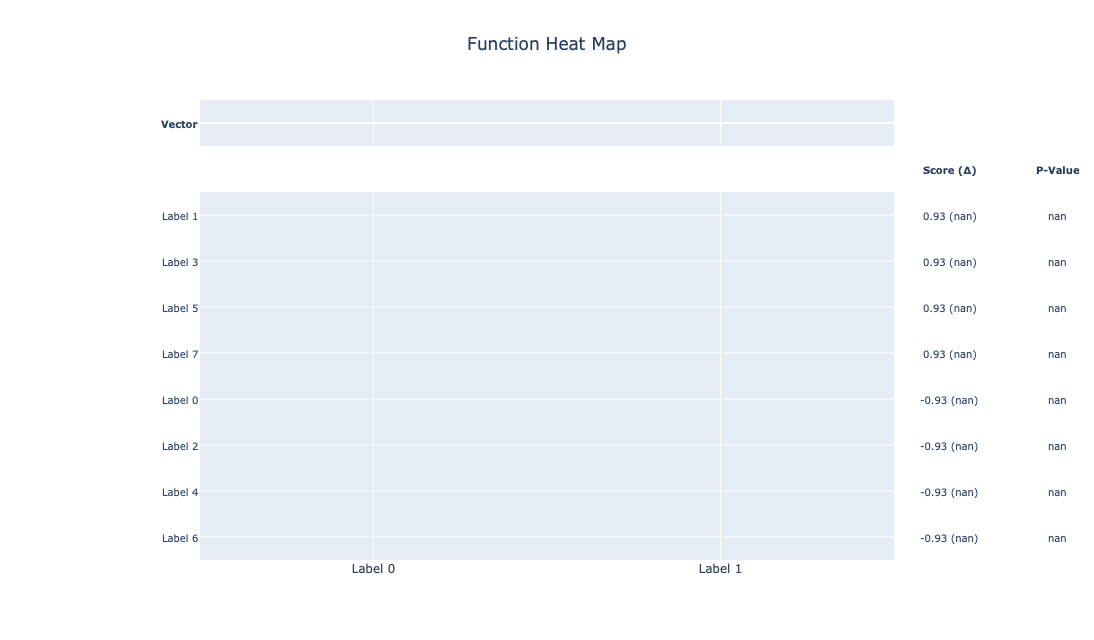

Computing score with get_ic


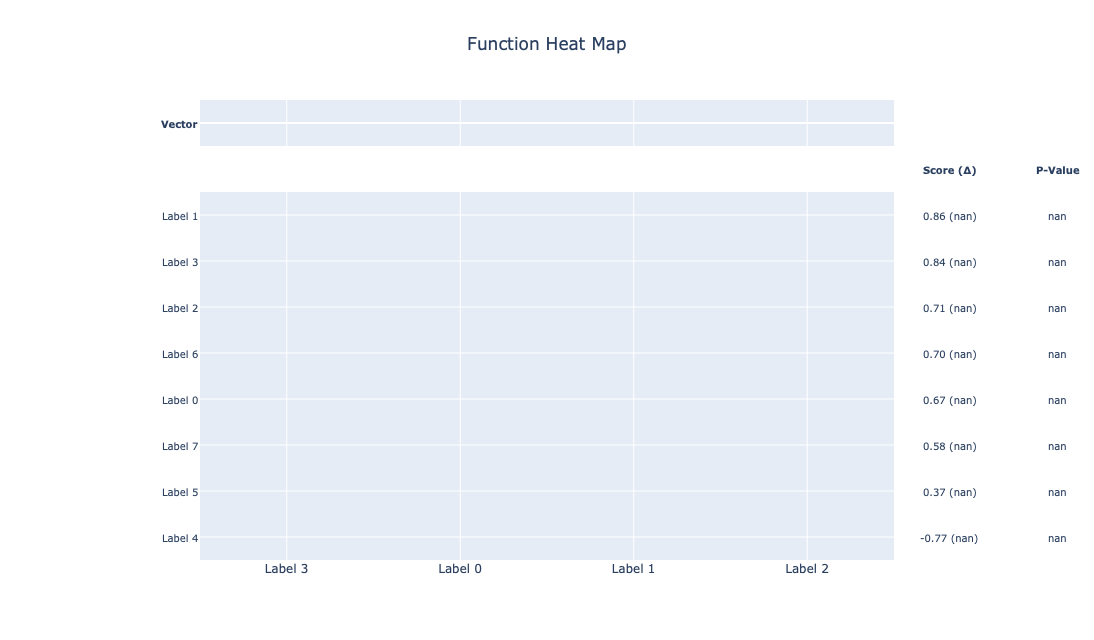

Computing score with get_ic


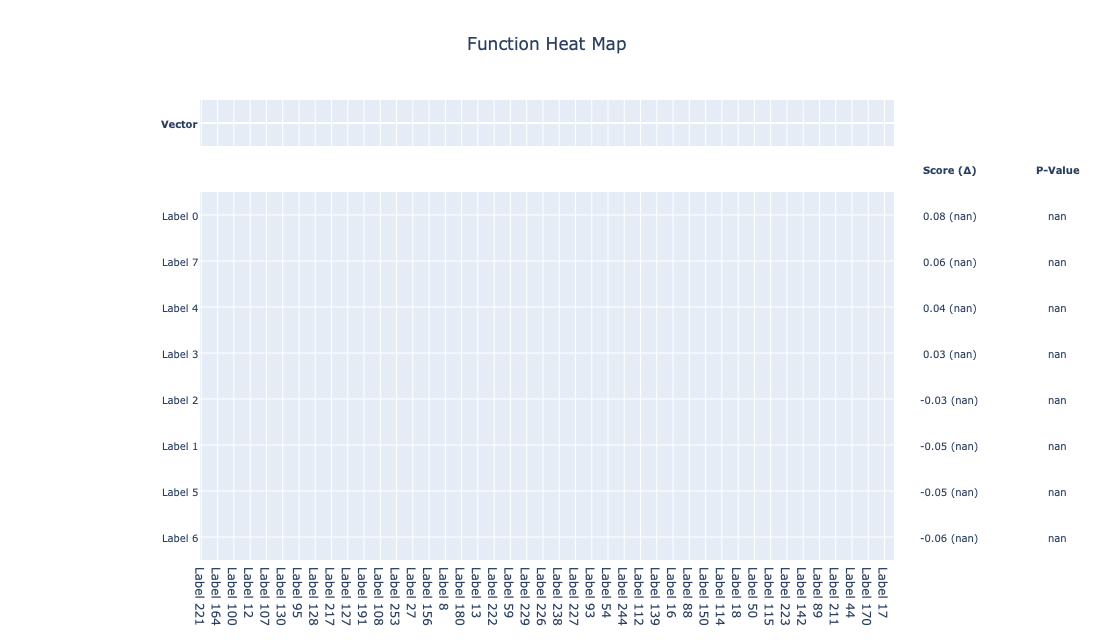

In [17]:
for shape in ([1, 8], [2, 8], [8, 8], [64, 8], [8, 2], [8, 4], [8, 256]):

    ta, da = simulate(shape)

    kwat.function_heat_map.make(ta, da, fu, n_pl=-1, n_sa=0, n_sh=0)

## summarize

Computing score with get_ic
Computing margin of error with 10 sampling
Computing p-value and q-value with 10 shuffling
Computing score with get_ic
Computing margin of error with 10 sampling
Computing p-value and q-value with 10 shuffling
Computing score with get_ic
Computing margin of error with 10 sampling
Computing p-value and q-value with 10 shuffling


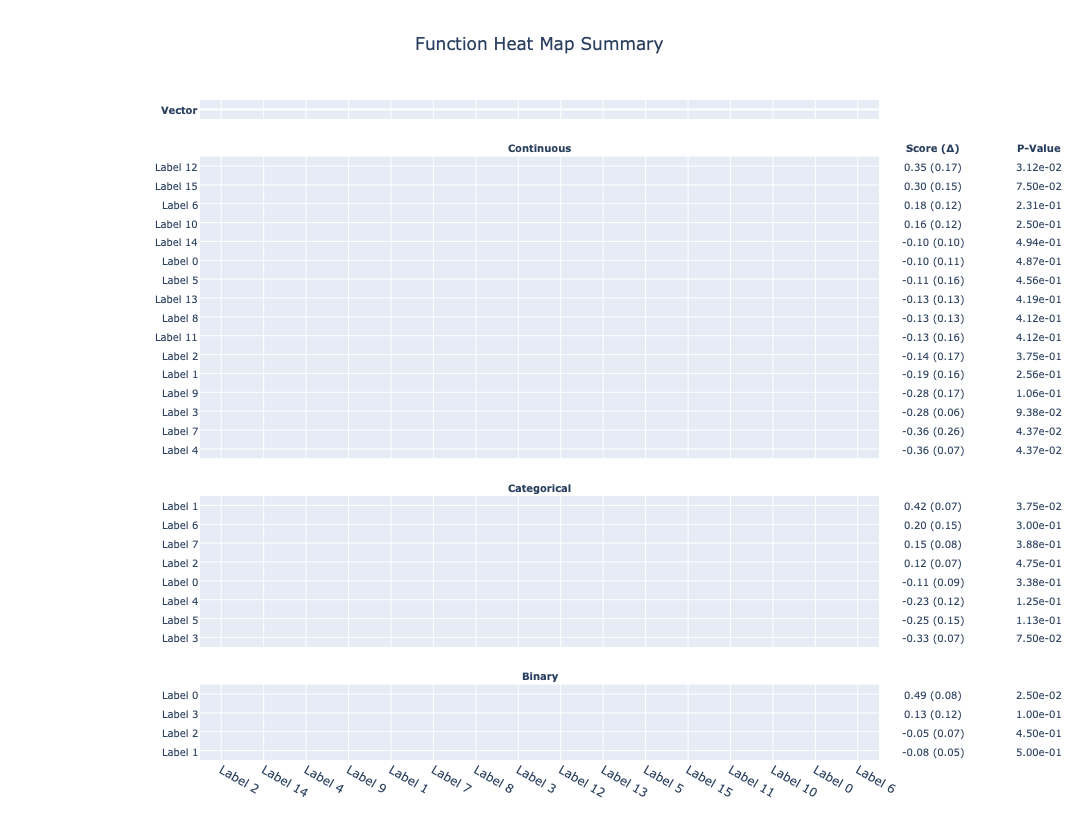

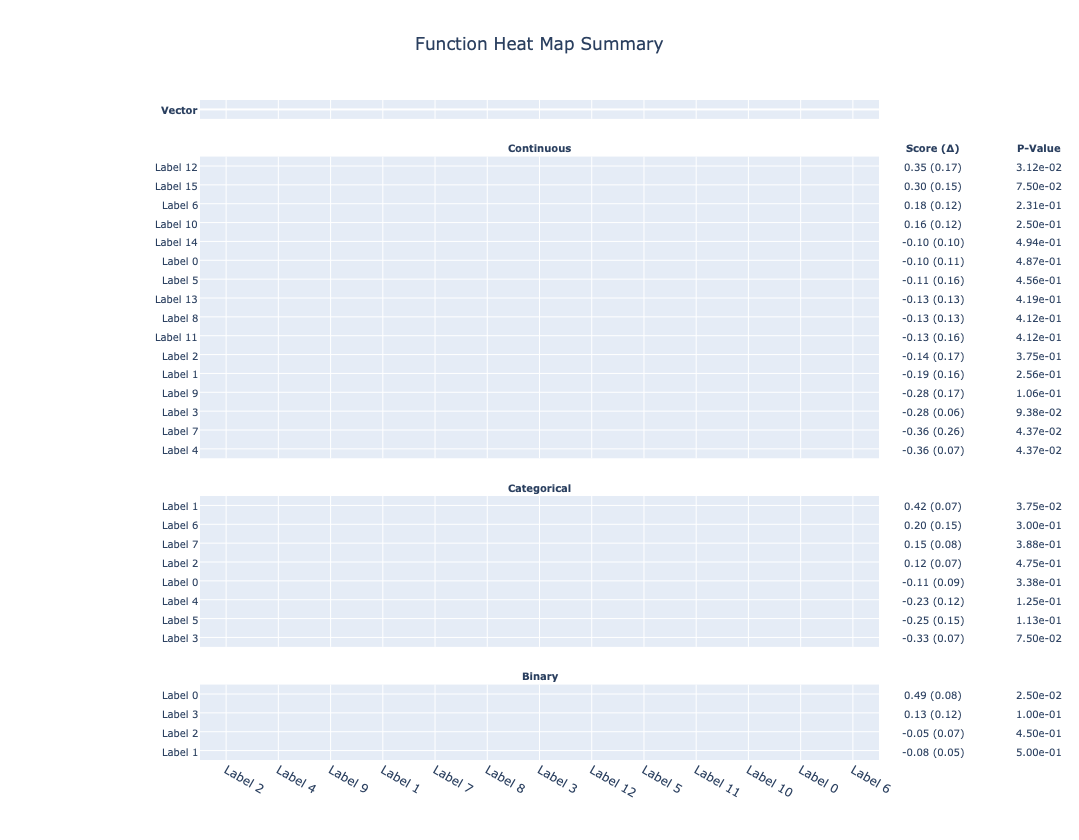

In [19]:
n_co = 16

ta, da = simulate([16, n_co])

da0n = simulate([8, n_co], 4)[1]

da01 = simulate([4, n_co], 2)[1]

da.drop(da.columns.values[-3], axis=1, inplace=True)

da0n.drop(da0n.columns.values[-2], axis=1, inplace=True)

da01.drop(da01.columns.values[-1], axis=1, inplace=True)

pa_da = [
    {
        "name": "Continuous",
        "data": da,
        "type": "continuous",
    },
    {
        "name": "Categorical",
        "data": da0n,
        "type": "categorical",
    },
    {
        "name": "Binary",
        "data": da01,
        "type": "binary",
    },
]

for ve in pa_da:

    ve["statistic"] = kwat.function_heat_map.make(ta, ve["data"], fu, pl=False)

for it in [False, True]:

    kwat.function_heat_map.summarize(ta, pa_da, it=it)